# 30 seconds example

In this example a **new workflow** consisting of [**Sentinel-2 L2A data**](https://marketplace.up42.com/block/c4cb8913-2ef3-4e82-a426-65ea8faacd9a)
and [**Sharpening Filter**](https://marketplace.up42.com/block/e374ea64-dc3b-4500-bb4b-974260fb203e) is created.
The area of interest and workflow parameters are defined. After **running the job**, 
the results are **downloaded** and visualized.

In [1]:
import up42

In [2]:
#up42.authenticate(project_id="project ID string", project_api_key="project-API-key")
up42.authenticate(cfg_file="config.json")
project = up42.initialize_project()

In [3]:
# Construct workflow
workflow = project.create_workflow(name="30-seconds-workflow", use_existing=True)
input_tasks = ["Sentinel-2 L2A Visual (GeoTIFF)", "Sharpening Filter"]
workflow.add_workflow_tasks(input_tasks)

In [4]:
# Define the aoi and input parameters of the workflow to run it.
# Can also use up42.draw_aoi(), up42.read_vector_file(), provide a FeatureCollection, GeoDataFrame etc.
aoi = up42.get_example_aoi(as_dataframe=True)
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation="bbox", 
                                                 start_date="2018-01-01",
                                                 end_date="2020-12-31",
                                                 limit=1)
input_parameters["esa-s2-l2a-gtiff-visual:1"].update({"max_cloud_cover":5})

In [5]:
# Price estimation
workflow.estimate_job(input_parameters)

{'esa-s2-l2a-gtiff-visual:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0.027816,
    'max': 0.027816},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}},
 'sharpening:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0.027816,
    'max': 0.027816},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 308, 'max': 349},
   'credit': {'min': 1, 'max': 1}}}}

In [6]:
# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

In [7]:
# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

In [8]:
job.download_results()

3it [00:00, 1094.45it/s]


['/Users/andres.hernandez-camacho/Documents/UP42_Assignments/up42-py/examples/guides/project_1d53e295-95a7-423d-9f09-68bbbebf74c2/job_1e20db4b-a0bf-4b6e-a3a1-5b678f8bd691/S2B_32UQD_20201219_0_L2A/S2B_32UQD_20201219_0_L2A_visual.tif',
 '/Users/andres.hernandez-camacho/Documents/UP42_Assignments/up42-py/examples/guides/project_1d53e295-95a7-423d-9f09-68bbbebf74c2/job_1e20db4b-a0bf-4b6e-a3a1-5b678f8bd691/data.json']

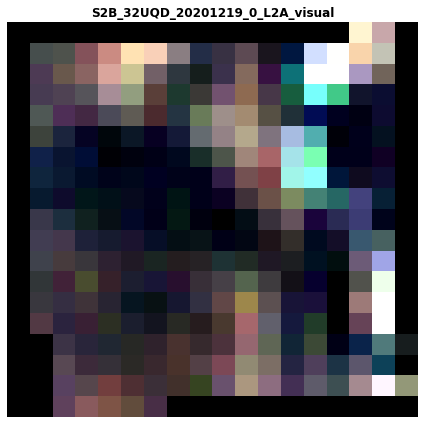

In [9]:
job.plot_results(figsize=(6,6))